# COGS 108 - Final Project 

# Overview

For this project, we will be analyzing the impact Black Lives Matter protests have on political party percentage numbers (Republicans, Independents, Democrats). Through our data analysis, we concluded that protest numbers have little impact on the political parties affiliations. There are a lot more factors that could have affected the percentages and so we cannot say that protest numbers show visible impact on the political party affiliations.

# Names

- Jonathan Leigh
- Bryan Nguyen
- Reena Dacanay
- Janelle Uy

# Research Question

Can we predict a change in political party affiliation between Independents, Democrats, and Republicans as a result of protests pertaining to the Black Lives Matter movement and the resulting police brutality?

## Background and Prior Work

In recent events, the United States has experienced an increased number of Black Lives Matter protests sparked by the death of George Floyd. Although George Floyd is not the first African American to die in police custody, his death has sparked sustained and widespread protests across the United States. [1] These protests not only raised awareness of racial discrimination, but also led to increased debates on other issues such as public funding and poverty.

For our project, we are interested in the shift in party affiliation in America as it pertains to us right now in our current situation given the recent 2020 presidential election and the rise of movements like Black Lives Matter. We are also interested in whether this new movement will affect future elections and measure how much of an impact new political issues stemming from systemic racism and America’s diversity affect the political space over time. The article 'Republicans And Democrats Agree On The Protests But Not Why People Are Protesting'  shows the divide between the acceptance rate of the protests and shows a huge margin between the Democrats and Republicans when it comes to the protests. [2] We also know that the majority of those who identify as Democrats tend to be younger, and college-educated. By determining whether or how much party affiliation has shifted as a result of police brutality protests, we can make a case for how important people’s voices are and how instrumental protests are in inducing political change. The article 'Americans Increasingly Polarized When it Comes to Racial Justice Protests, Poll Finds' shows that the George Floyd protests had a significant impact on people’s views on the Jacob Blake protests approximately 3 months later. [3] As a result, we are interested in seeing if these protests will have a similar impact and lead to changes in political party affiliation.


References:
- 1) https://www.bbc.com/news/world-us-canada-52969905
- 2) https://fivethirtyeight.com/features/republicans-and-democrats-increasingly-agree-on-the-protests-but-not-why-people-are-protesting/
- 3) https://www.npr.org/2020/09/03/908878610/americans-increasingly-polarized-when-it-comes-to-racial-justice-protests-poll-f

# Hypothesis


As a result of the protests and growing media coverage of Black Lives Matter, we make the conjecture that America as a whole has shifted away from Republicans and more towards the Democratic Party, with Independents also shifting toward the Democratic Party. We believe the Democratic Party’s values of multiculturalism and egalitarianism are more likely to align with and be similar to those participating in the Black Lives Matter movement.

# Dataset(s)


- Dataset Name: Crowd Counting Consortium
- Link to the dataset: https://sites.google.com/view/crowdcountingconsortium/view-download-the-data
- Number of observations: Originally, when combining the multiple datasets together, there were 38809 observations. Once the dataset was cleaned for the proper events, there were a total of 9090 observations.
- Variables: The file originally contained 27 features but we chose to focus on StateTerritory, Date, Claim, Event Type.
 
We used multiple datasets from the same source, combining datasets as there was individual datasets for each month. The datasets include information of political crowd gatherings that happened all across the U.S. including the type of event, purpose of the gathering (eg. anti-racism), and where the event occurred. 

- Dataset Name: Party Affiliation
- Link to the dataset: https://news.gallup.com/poll/15370/party-affiliation.aspx
- Number of observations: 245
- Variables: Republicans, Independents, Democrats

This dataset tracks the percentages of political party affiliation (Republican, Independent, Democrat) across periods of approximately 2 weeks each from June 2007 to October 2020.


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Data Cleaning

### Protest Data Cleaning:
The original data for protest numbers was very messy and not clean. We started off with data that covered any type of outside event (protests/march/vigils) that did not necessarily have to do with BLM. In addition to that, it included different columns that were not needed for our observations and some rows were missing data for the columns we care about.
- 1) To start off, the data were in separate csv files per month, so the first thing we did was combine all the data we need into a single csv file.
- 2) Next, we removed any unnecessary column that we don't need for our observation, so the only columns we have left were:
	 
     - StateTerritory
	 - Date: use this to track how many protests occurred at a certain date
	 - Claim: use to check for events that are fighting for antiracism
	 - EventType: use to check that the event is a protest
     
- 3) After that, we removed any rows that did not have any entries for important rows: Date, Claim and EventType as those are needed to determine if that event is valid to include as part of our data
- 4) Next we will only include rows (events) in our data that are protest (or similar to protest) event types and are fighting against racism
- 5) Next up, we reformatted the dates in the csv file to make sure they are all the same format of yyyy/mm/dd so that we can compare dates correctly when doing date ranges

In [2]:
df = pd.read_csv('protest_statistics.csv')

#first drop unneeded columns
df = df.drop(['Pro(2)/Anti(1)', 'EstimateLow', 'EstimateText', 'BestGuess', 'EstimateHigh', 
              'Location', 'CityTown', 'Actor', 'ReportedArrests', 'ReportedParticipantInjuries', 
              'ReportedPoliceInjuries', 'ReportedPropertyDamage', 'TownsCities', 'Events', 'AdjustedHigh', 
              'AdjustedLow','Source1','Source2', 'Source3', 'Country'], axis=1)
df = df.drop(['Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
               'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
               'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
               'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
               'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
               'Unnamed: 44'], axis=1)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7,8,9,10,18,19,20,23,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#remove any rows with no event type, location(state) or claim type
df = df[df['EventType'].notna()]
df = df[df['Claim'].notna()]
df = df[df['Date'].notna()]

In [4]:
# clean_event looks through all the rows and filters the events that are protests else change to nan
def clean_event(event):
    clean_event_list = ['protest', 'rally', 'march', 'demonstration', 'walk', 'sit-in', 'kneel in', 'educational',
                        'honk and wave', 'solidarity', 'discussion', 'block party']
    event = event.lower()
    for key in clean_event_list:
        if key in event:
            return 'protest'
    return np.nan

# clean_claims looks through all the rows to find all anti-racism claims and rename to a single key else change to nan
def clean_claims(claim):
    claim = claim.lower()
    clean_claim_list = ['antiracism', 'against racism', 'black lives', 'black representation', 'police brutality', 
         'racist', 'black', 'police violence', 'systemic racism', 'george floyd', 'black trans lives matter', 
         'racial equity', 'anti-racism', 'black', 'against police shooting', 'blm']
    for key in clean_claim_list:
        if key in claim:
            return 'antiracism'
    return np.nan

df = df[df['Date'] != '0208-10-14']
df = df[df['Date'] != '2019-04']

def reformat_date(date):
    new_date = date.split('/')
    if len(new_date[1]) == 1:
        new_date[1] = '0' + new_date[1]
    if len(new_date[0]) == 1:
        new_date[0] = '0' + new_date[0]
    return new_date[2] + '/' + new_date[0] + '/' + new_date[1]

df['Date'] = df['Date'].apply(reformat_date)

# clean the rows for protest events
df['EventType'] = df['EventType'].apply(clean_event)
# drop the non-protest rows
df = df[df['EventType'].notna()]

# clean the claim rows
df['Claim'] = df['Claim'].apply(clean_claims)
# drop all the non anti-racism claims
df = df[df['Claim'].notna()]

### Political Party Affiliation Cleaning:
The original data for political party affiliation was not grouped nor ordered very well. The data was indexed by ranges of dates but the ranges of dates differed from eachother. For example, one of the ranges from 2019 was Oct 14-31, while another range from 2020 was Oct 16-31. Also, some ranges carried over into the next month. We also noticed that while the data was listed from present to past in terms of year, the data was listed from past to present in terms of month.
- 1) We wrote *monthToID()* function to take in the month name and output the month number.
- 2) We used *mNorm()* function to take in a range (originally formatted as YYYY name_of_month DD(start)-DD(end) and break it into a start date and an end date in the format MM DD YYYY.
- 3) We then made a list of the new start and end dates of the data. This list is ordered sequentially, and by dates instead of ranges.
- 4) However, since we did not have any political party affiliation data between each respective start and end dates, we used interpolation to estimate the affiliation percentages for each day in the format of [republicans, independents, democrats]. The function that performs the interpolation is *getDate()* function, as seen below.

In [5]:
df_gallup_data = pd.read_csv("gallup.csv")

def monthToID(month):
    return ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'].index(month) + 1
def returnDays(month): 
    days = [31,29,31,30,31,30,31,31,30,31,30,31]
    return days[month]
def mNorm(date): 
    #date = date.trim()
    year = date[:4]
    date = date[4:]
    date = date.split("-")
    start = date[0].strip().split(' ') 
    end = date[1].strip().split(' ') 
    
    monthID = monthToID(start[0])
    startDate = [monthID,int(start[1]),int(year)]
    endDate = ""
    if len(end) > 1:
        endDate = [monthToID(end[0]),int(end[1]),int(year)]
    else:
        endDate = [monthID,int(end[0]),int(year)]
    return [startDate, endDate]
    


datesList = []
for index, row in df_gallup_data.iterrows():
    datesList.append([mNorm(row[0])[1], [row[1], row[2], row[3]]])
    datesList.append([mNorm(row[0])[0], [row[1], row[2], row[3]]])
    

def calcDifferenceDays(m1,d1, m2,d2, m3,d3): 
    if m1 == m2: 
        return float(d3-d1) / (d2-d1)
    elif m1 != m2: 
        daysInM1 = returnDays(m1-1) 
        rangeDays = (daysInM1 - d1) + d2
        return float(d3-d1) / rangeDays
    
    
def getDate(m,d,y):
    if m >= 10 and y == 2020: 
        return [31, 36, 31]
    elif y > 2020: 
        return [31, 36, 31]
    elif y > 2007:
        subList = []
        for a in datesList: 
            if m != 12 and m != 1 and a[0][2] == y and (a[0][0] == m or a[0][0] == m-1 or a[0][0] == m+1): 
                subList.append(a)
            elif m == 12 and ((a[0][2] == y and (a[0][0] == m or a[0][0] == m-1) or (a[0][0] == 1 and a[0][2] == y + 1))):
                subList.append(a)
            elif m == 1 and ((a[0][2] == y and (a[0][0] == 1 or a[0][0] == 2)) or (a[0][0] == 12 and a[0][2] == y - 1)):
                subList.append(a)
        #print(subList)
        subList.reverse()
        greaterThan = False 
        start = []
        end = []
        #print(subList)
        for a in subList: 
            #print(str(m) + " - " + str(a[0][0]))
            if ((m > a[0][0] and a[0][2] == y) or (m == 1 and a[0][0] == 12 and a[0][2] == y-1)) or (d >= a[0][1] and m == a[0][0]): 
                greaterThan = True
                start = a 
            elif m == a[0][0] and d <= a[0][2] and greaterThan:
                end = a 
                break
            elif m < a[0][0] or ( m == 12 and a[0][0] == 1 ) and y <= a[0][2] and greaterThan:
                end = a 
                break
        #print(start)
        #print(end)
        interpolate = calcDifferenceDays(start[0][0], start[0][1], end[0][0], end[0][1], m,d)
        return [start[1][0]+(end[1][0]-start[1][0])*interpolate, start[1][1]+(end[1][1]-start[1][1])*interpolate, start[1][2]+(end[1][2]-start[1][2])*interpolate] 
    else: 
        return [27,38,34]


### Combining the two data sets:
After cleaning both data sets, we decided to combine the two into one data frame for easier analysis. We decided that we want to group the protest count into 2-week ranges (for the first and second half of the month), along with it the total protest count for that 2-week range and the party affiliation percentage. We use the middle date of the week range (16) to put into our interpolation method to get those percentages.

Our data frame will have the columns: *Date*, *Protest Count*, *Republicans Percentage*, *Independents Percentage*, and *Democrats Percentage*. 

- For example, our data frame will have a row with the date listed as 2018/04/01 meaning that the row is for the date range 2018/04/01-2018/04/15 and it will have a *Protest Count* that occurred between 2018/04/01-2018/04/15. Then we will call the *getDate()* function (the interpolation function) to get the estimated party affiliation percentage on 2018/04/08: *getDate(4, 8, 2018)*.
- 1) We first start off by counting all the total protest events for each unique date.
- 2) Then use the data from the previous step to sum up the total number of protest for each half of the month.
- 3) Once we have that, we wrote a function to combine protest numbers and party affiliation percentage and put it all into a data frame.


In [6]:
#gives total count of protests for each date
#returns dict {date: protest count}
def count_events_by_date(dates, df):
    date_counts = {}
    for date in dates:
        rows, col = df[(df['Date'] == date)].shape
        date_counts[date] = rows
    return date_counts

dates = df['Date'].unique()
#grab all the anti-racism protests in the US per dates
date_counts = count_events_by_date(dates, df)
date_counts
date_df = pd.DataFrame(date_counts.items())
date_df.columns = ['Date', 'Protest Count']
date_df

,Date,Protest Count
0,2017/04/03,2
1,2017/04/04,2
2,2017/04/10,1
3,2017/04/16,1
4,2017/04/18,1
...,...,...
488,2020/11/25,3
489,2020/11/26,4
490,2020/11/27,7
491,2020/11/29,10


In [7]:
years_str = ['2017', '2018', '2019', '2020']
months_str = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
days_str = ['31', '28', '31', '30', '31', '30', '31', '31', '30', '31', '30', '31']

# get protest month for a range of dates (2 weeks)
def get_range():
    date_counts_range = {}
    for year in years_str:
        for month in months_str:
            ym = year + '/' + month + '/'
            first_range = (ym+'01', ym+'15')
            second_range = (ym+'16', ym+days_str[int(month)-1])
            in_range_df = date_df[(date_df['Date'] <= first_range[1]) & (date_df['Date'] >= first_range[0])]
            date_counts_range[first_range] = in_range_df['Protest Count'].sum()
            in_range_df = date_df[(date_df['Date'] <= second_range[1]) & (date_df['Date'] >= second_range[0])]
            date_counts_range[second_range] = in_range_df['Protest Count'].sum()
            
    return date_counts_range
ranged_date_counts = get_range()

In [8]:
# grab (date, protest count, party affiliation)
def combine_protest_party():
    data = []
    for dates, count in ranged_date_counts.items():
        start = dates[0].split('/') # [ yyyy, mm, dd ]
        end = dates[1].split('/') # [ yyyy, mm, dd ]
        # skip dates after 10/31/2020 as we do not have party affiliation data for this time yet
        # skip anything before 4/2020 as we do not have protest data for those dates
        if (start[1] >= '11' and start[0] == '2020') or (start[1] < '04' and start[0] == '2017'):
            continue
        mid = int((int(end[2])-int(start[2]))/2)+int(start[2])-1 # grab mid date of the 2 week range
        party_percentage = getDate(int(start[1]), mid, int(start[0]))
        data.append([dates[0], count, party_percentage[0], party_percentage[1], party_percentage[2]])  
    return data

data = combine_protest_party()
final_df = pd.DataFrame(data, columns = ['Date', 'Protest Count', 'Republicans Percentage', 'Independents Percentage', 'Democrats Percentage'])

# Data Analysis & Results

### EDA


Below is our graph for the number of protest counts over time from April 1, 2017 - October 31, 2020

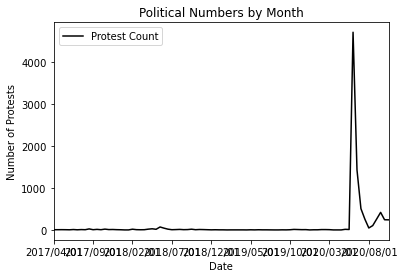

In [9]:
ax = plt.gca()

final_df.plot(x='Date',y='Protest Count',kind='line',color='black',ax=ax)

plt.title('Political Numbers by Month')
plt.ylabel('Number of Protests')

plt.show()


This graph shows the number of protests over time. 

Below is our graph for each political party percentage from April 1, 2017 - October 31, 2020

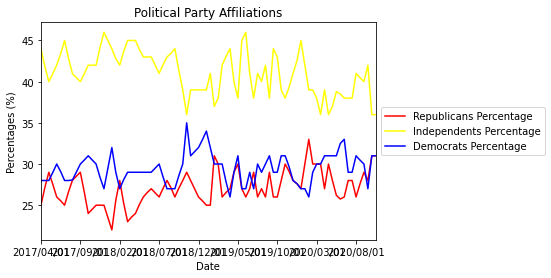

In [10]:
ax = plt.gca()

final_df.plot(x='Date',y='Republicans Percentage',kind='line',color='red',ax=ax)
final_df.plot(x='Date',y='Independents Percentage',kind='line',color='yellow',ax=ax)
final_df.plot(x='Date',y='Democrats Percentage',kind='line',color='blue',ax=ax)

plt.title('Political Party Affiliations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Percentages (%)')

plt.show()

This graph shows the political party affiliation percentages of Republicans, Indpendents, and Democrats.

[Text(0, 0.5, 'Count')]

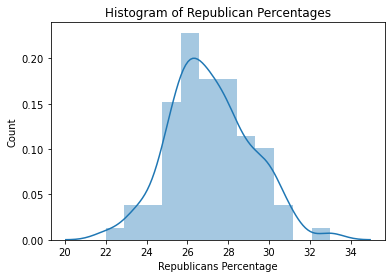

In [11]:
rep_plot = sns.distplot(final_df['Republicans Percentage'])
rep_plot.set_title('Histogram of Republican Percentages')
rep_plot.set(ylabel='Count')

[Text(0, 0.5, 'Count')]

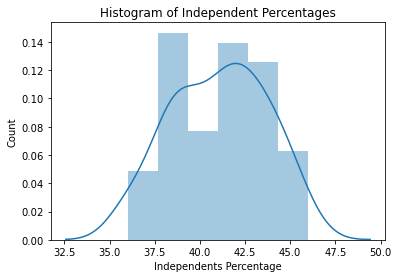

In [12]:
ind_plot = sns.distplot(final_df['Independents Percentage'])
ind_plot.set_title('Histogram of Independent Percentages')
ind_plot.set(ylabel='Count')

[Text(0, 0.5, 'Count')]

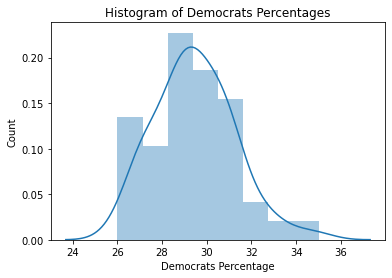

In [13]:
dem_plot = sns.distplot(final_df['Democrats Percentage'])
dem_plot.set_title('Histogram of Democrats Percentages')
dem_plot.set(ylabel='Count')

As we can see above, the Republican, Independent, and Democrat Percentages have an approximately normal distribution.

#### Analysis 

Let's look at the final dataframe with everything inside of it: 

In [14]:
final_df

,Date,Protest Count,Republicans Percentage,Independents Percentage,Democrats Percentage
0,2017/04/01,5,25.000000,44.000000,28.000000
1,2017/04/16,5,27.166667,41.833333,28.000000
2,2017/05/01,6,29.000000,40.000000,28.000000
3,2017/05/16,5,27.548387,40.967742,28.967742
4,2017/06/01,3,26.000000,42.000000,30.000000
...,...,...,...,...,...
81,2020/08/16,103,27.578947,40.473684,30.473684
82,2020/09/01,260,29.000000,40.000000,30.000000
83,2020/09/16,418,28.000000,42.000000,27.000000
84,2020/10/01,242,31.000000,36.000000,31.000000


##### Splitting up the data
First, we split the large dataframe into three different dataframes so that it's easier for us to predict the labels and calculate the EMA (exponential moving average) later on. 

We want to predict for each label or dependent variable separately. Our dependent variable is political party affiliation percentage. 

To do this, we make each dataframe's y-column only one column representing the respective political party's percentage.

Note that although it may seem that all members of the US are either a Republican, Independent, or Democrat, the percentages do not total 100%, and our model's predictions do not either. There are nonrespondents that make up the rest.

In [15]:
republicans_df = final_df[['Date', 'Protest Count', 'Republicans Percentage']]
independents_df = final_df[['Date', 'Protest Count', 'Independents Percentage']]
democrats_df = final_df[['Date', 'Protest Count', 'Democrats Percentage']]

Lets take a look at a raw output of one of these dataframes to get a sense of what we're working with. 

In [16]:
republicans_df

,Date,Protest Count,Republicans Percentage
0,2017/04/01,5,25.000000
1,2017/04/16,5,27.166667
2,2017/05/01,6,29.000000
3,2017/05/16,5,27.548387
4,2017/06/01,3,26.000000
...,...,...,...
81,2020/08/16,103,27.578947
82,2020/09/01,260,29.000000
83,2020/09/16,418,28.000000
84,2020/10/01,242,31.000000


Let's just take a look at the standard deviations and means of all three percentages to get a feel for what we're working with. 

In [17]:
print("Republicans Standard Deviation", np.std(republicans_df['Republicans Percentage']))
print("Independents Standard Deviation", np.std(independents_df['Independents Percentage']))
print("Democrats Standard Deviation", np.std(democrats_df['Democrats Percentage']))

Republicans Standard Deviation 2.012599340886173
Independents Standard Deviation 2.611554193515989
Democrats Standard Deviation 1.7612271153716295


In [18]:
print("Republicans Mean", np.mean(republicans_df['Republicans Percentage']))
print("Independents Mean", np.mean(independents_df['Independents Percentage']))
print("Democrats Mean", np.mean(democrats_df['Democrats Percentage']))

Republicans Mean 27.10624047838859
Independents Mean 41.04103689021504
Democrats Mean 29.455139632591163


We see that the mean of Democrats and Republicans are around even, with a slight lean towards Democrats. This is reflected in the popular vote in 2012, 2016, and 2020. The number of Independents is much larger. We are not exactly sure how Gallup defines an Independent, but we assume that it is tied to their voter registration. We know that there is a growing population of Independent voters, as more than half of Hispanics in 2019 identify as Independent, and there is a large portion of immigrants that identify as Independent but lean Democratic.

We must take care to understand that there may be a larger latent population of Democratic voters than is shown in the voter affiliation percentages, and that voter affiliation generally does not *always* determine which party one votes for. 

Let's look at the length of the data to see how many datapoints we can work with, and if we can reasonably split this into a training and test set for our machine learning model.


In [19]:
print("Length of the data", len(republicans_df))

Length of the data 86


Since we have 86 datapoints, we'll split this into 80 training points and 6 test points. This will train the model on the majority of the protests that were happening in May and June as a result of Black Lives Matter and also protests regarding racism leading up to this past summer. 6 test points with each test point representing a bi-weekly estimate is a 3 month time period up until October 16, 2020. So we will use this as our validation set, from July 16, 2020 to Oct 16, 2020. 

We split the dataset up this way instead  of splitting it 80/20 because it is historical data and we wanted to train the model on protests that were happening in June as a result of George Floyd's murder. 


In [20]:
split = 80

We split the training set from 0-80 datapoints, and 81-86 as the validation dataset. 

In [21]:

# convert dataframe to list so that we can splice more easily into the training and test sets 
rep_y = republicans_df['Republicans Percentage'].values.tolist()
rep_x = republicans_df['Protest Count'].values.tolist()


dem_y = democrats_df['Democrats Percentage'].values.tolist()
dem_x = democrats_df['Protest Count'].values.tolist()


ind_y = independents_df['Independents Percentage'].values.tolist()
ind_x = independents_df['Protest Count'].values.tolist()


#make training and test set for each political party. 
rep_y_train = rep_y[:split]
rep_x_train = rep_x[:split]
rep_y_test = rep_y[split:]
rep_x_test = rep_x[split:]


ind_y_train = ind_y[:split]
ind_x_train = ind_x[:split]
ind_y_test = ind_y[split:]
ind_x_test = ind_x[split:]


dem_y_train = dem_y[:split]
dem_x_train = dem_x[:split]
dem_y_test = dem_y[split:]
dem_x_test = dem_x[split:]

We will define a simple and naive LinearRegression model to train our data on. This does not take into account moving averages, and generally does not apply well to data that exists in a TimeSeries format. But we will evaluate how well our predictions do on the Mean Squared error (MSE) indicator. 

###### Target Variable 

Our target variable is the percentage of people that affiliate themselves with this particular politcal party. We have three models for each political party, that predicts the percentage of each political party. 

We understand that this may not be the best cost function to use, because we are predicting fractions and ratios, but we were not able to find an implementation in a python library that was able to train a machine learning function to predict a ratio of 3 separate entities, so we decided to predicting percetage based on just protest count. 

##### Linear Regression (Naive)

In [22]:
clf = linear_model.LinearRegression() #sklearn's linear regression model

In [23]:
# fit the model with the X and y params 
clf.fit ( np.array(rep_x_train).reshape(-1,1), np.array(rep_y_train) ) 

# predict our datapoints based on the test set 
rep_y_pred = clf.predict(np.array(rep_x_test).reshape(-1,1))

# calculate the MSE or cost score of the values predicted.
MSE_rep = mean_squared_error(rep_y_test, rep_y_pred)

#print summary of cost/coefficient
print("Republican Percentage Predictions MSE (Naive Linear Regression):", MSE_rep)
print ("Coeffiecient of x-term in predictor: ", clf.coef_)

Republican Percentage Predictions MSE (Naive Linear Regression): 6.628678726354164
Coeffiecient of x-term in predictor:  [-0.00027298]


In [24]:
# fit the model with the X and y params 
clf.fit ( np.array(dem_x_train).reshape(-1,1), np.array(dem_y_train) )

# predict our datapoints based on the test set 
dem_y_pred = clf.predict(np.array(dem_x_test).reshape(-1,1))

# calculate the MSE or cost score of the values predicted.
MSE_dem = mean_squared_error(dem_y_test, dem_y_pred)

#print summary of cost/coefficient
print("Democratic Percentage Predictions MSE (Naive Linear Regression):", MSE_dem)
print ("Coeffiecient of x-term in predictor: ", clf.coef_)

Democratic Percentage Predictions MSE (Naive Linear Regression): 2.575313312608437
Coeffiecient of x-term in predictor:  [0.00080774]


In [25]:
# fit the model with the X and y params 
clf.fit ( np.array(ind_x_train).reshape(-1,1), np.array(ind_y_train) )

# predict our datapoints based on the test set 
ind_y_pred = clf.predict(np.array(ind_x_test).reshape(-1,1))

# calculate the MSE or cost score of the values predicted.
MSE_ind = mean_squared_error(ind_y_test, ind_y_pred)

#print summary of cost/coefficient
print("Independent Percentage Predictions MSE (Naive Linear Regression):", MSE_ind)
print ("Coeffiecient of x-term in predictor: ", clf.coef_)

Independent Percentage Predictions MSE (Naive Linear Regression): 8.989224520870522
Coeffiecient of x-term in predictor:  [-0.00080485]


#### Linear regression with Exponential Moving Average (EMA) to accomodate for historical/time series data

Now we move on from our linear regression approach and try incorperating EMA as a feature to our model. Instead of having one feature [# of protests], now we have two features: [# of protests, EMA of this date for the percentage]. As we see later on, it better accomodates to shifts in trends characteristic of historical data which is normally shifted to the right due to a delay.

Calculate EMA's using pandas' ewm function. We calculate two different types of Moving Averages here: 

    - one with a lag of 5 datapoints (almost two months)
    - one with a lag of 10 dataponts (around five months lag)
    
We'll see how these models perform against eachother in the following section. 

In [26]:
# calculate all the moving averages for the republican, independent, and democrat percentages. 
rep_ema = republicans_df['Republicans Percentage'].ewm(span=5, adjust=False).mean()
rep_ema10 = republicans_df['Republicans Percentage'].ewm(span=10, adjust=False).mean()
dem_ema = democrats_df['Democrats Percentage'].ewm(span=5, adjust=False).mean()
dem_ema10 = democrats_df['Democrats Percentage'].ewm(span=10, adjust=False).mean()
ind_ema = independents_df['Independents Percentage'].ewm(span=5, adjust=False).mean()
ind_ema10 = independents_df['Independents Percentage'].ewm(span=10, adjust=False).mean()

Now split into training and test sets for EMA. 

In [27]:
# split into training and test sets based off of the split we defined earlier 
rep_train_ema = rep_ema[:split]
rep_train_ema10 = rep_ema10[:split]
dem_train_ema = dem_ema[:split]
dem_train_ema10 = dem_ema10[:split]
ind_train_ema = ind_ema[:split]
ind_train_ema10 = ind_ema10[:split]
rep_test_ema = rep_ema[split:]
rep_test_ema10 = rep_ema10[split:]
dem_test_ema = dem_ema[split:]
dem_test_ema10 = dem_ema10[split:]
ind_test_ema = ind_ema[split:]
ind_test_ema10 = ind_ema10[split:]

Let's take a look at both of the feature representations' as a vector. 

In [28]:
print(np.array(rep_x_train))

[   5    5    6    5    3    9    3    8    5   24    5   13    5   19
    8   10    6    4    0    0   17    6    4    5   18   27   15   70
   42   18    5    8   12    6    8   17    5   10    8    5    2    4
    2    2    0    1    1    1    1    0    3    1    4    2    2    1
    0    0    2    1    4   12    9    6    7    0    3    3    8    8
    6    0    0    0   14   10 4709 1429  507  257]


In [29]:
print(np.array(rep_train_ema))

[25.         25.72222222 26.81481481 27.05933891 26.70622594 26.31803952
 25.87869301 26.12746201 26.76239403 27.34697236 27.89798157 27.46532105
 26.31021403 25.70680936 25.47120624 25.31413749 25.20942499 24.63961666
 23.75974444 24.37316296 25.58210864 25.47140576 24.64760384 24.28506923
 24.19004615 24.4933641  24.99557607 25.51220223 26.00813482 26.17208988
 26.11472659 26.42569074 26.95046049 27.01045192 26.67363462 26.79996694
 27.19997796 27.79998531 27.86665687 27.57777125 27.0518475  26.54250151
 26.02833434 25.68555623 27.45703748 28.30469166 27.5364611  27.20612558
 27.13741706 27.75827804 28.50551869 28.00367913 27.33578609 27.22385739
 27.81590493 27.21060328 27.14040219 26.76026813 27.50684542 27.00456361
 26.66970907 27.11313938 28.07542626 28.42065454 28.28043636 28.05732794
 27.7048853  28.46992353 29.97994902 29.98663268 29.99108845 29.99405897
 28.99603931 29.33069288 28.88712858 27.99141906 27.24427937 26.82951958
 27.21967972 27.47978648]


#### Fitting the Model and Making Predictions 

Now that we understand our feature representation, we stack them into a 2D numpy array so that we can pass it in in a normalized format to the sklearn function. We use *np.column_stack* for this. We then fit the model off of the labels from the training y set, and make predictions accordingly.

###### MSE as our cost function
RMSE, or Root Mean Squared Error is the default cost function for sklearn's linear regression algorithm on continuous variables, so we use sklearn's MSE function to calculate exactly the cost of the final predictions on the percentages of political affiliaiton off of protest count. We use this to evaluate the performance of our models across different model types and different hyperparameter settings of our models.

In [30]:
# fit the model with the X and y params 
X = np.column_stack((np.array(rep_x_train),np.array(rep_train_ema)))
clf.fit(X, np.array(rep_y_train) )
X_pred = np.column_stack((np.array(rep_x_test),np.array(rep_test_ema)))
rep_y_pred = clf.predict(X_pred)


MSE_rep = mean_squared_error(rep_y_test, rep_y_pred)

#print summary of cost/coefficient
print("Republican Percentage Predictions MSE (EMA-5 Linear Regression):", MSE_rep)
print ("Coeffiecient of x-term in predictor: ", clf.coef_)


Republican Percentage Predictions MSE (EMA-5 Linear Regression): 1.0694648010314796
Coeffiecient of x-term in predictor:  [-3.42226397e-04  1.15931137e+00]


In [31]:
# fit the model with the X and y params 
X = np.column_stack((np.array(rep_x_train),np.array(rep_train_ema10)))
X_pred = np.column_stack((np.array(rep_x_test),np.array(rep_test_ema10)))
clf.fit(X, np.array(rep_y_train))

rep_y_pred = clf.predict(X_pred)


MSE_rep = mean_squared_error(rep_y_test, rep_y_pred)

#print summary of cost/coefficient
print("Republican Percentage Predictions MSE (EMA-10 Linear Regression):", MSE_rep)
print ("Coeffiecient of x-term in predictor: ", clf.coef_)

Republican Percentage Predictions MSE (EMA-10 Linear Regression): 2.1201963183218173
Coeffiecient of x-term in predictor:  [-6.04722065e-04  1.14943258e+00]


In [32]:
# fit the model with the X and y params 
X = np.column_stack((np.array(dem_x_train),np.array(dem_train_ema)))
X_pred = np.column_stack((np.array(dem_x_test),np.array(dem_test_ema)))
clf.fit (X, np.array(dem_y_train) )
dem_y_pred = clf.predict(X_pred)


MSE_dem = mean_squared_error(dem_y_test, dem_y_pred)

#print summary of cost/coefficient
print("Democratic Percentage Predictions MSE (EMA-5 Linear Regression):", MSE_dem)
print ("Coeffiecient of x-term in predictor: ", clf.coef_)

Democratic Percentage Predictions MSE (EMA-5 Linear Regression): 1.1847603370233308
Coeffiecient of x-term in predictor:  [1.41313313e-04 1.19621587e+00]


In [33]:
# fit the model with the X and y params 
X = np.column_stack((np.array(dem_x_train),np.array(dem_train_ema10)))
X_pred = np.column_stack((np.array(dem_x_test),np.array(dem_test_ema10)))
clf.fit (X, np.array(dem_y_train) )
dem_y_pred = clf.predict(X_pred)


MSE_dem = mean_squared_error(dem_y_test, dem_y_pred)

#print summary of cost/coefficient
print("Democratic Percentage Predictions MSE (EMA-10 Linear Regression):", MSE_dem)
print ("Coeffiecient of x-term in predictor: ", clf.coef_)

Democratic Percentage Predictions MSE (EMA-10 Linear Regression): 1.8363283007190017
Coeffiecient of x-term in predictor:  [3.61951059e-04 1.22773239e+00]


In [34]:
# fit the model with the X and y params 
X = np.column_stack((np.array(ind_x_train),np.array(ind_train_ema)))
X_pred = np.column_stack((np.array(ind_x_test),np.array(ind_test_ema)))
clf.fit (X, np.array(ind_y_train) )
ind_y_pred = clf.predict(X_pred)
MSE_ind = mean_squared_error(ind_y_test, ind_y_pred)


#print summary of cost/coefficient
print("Independent Percentage Predictions MSE (EMA-5 Linear Regression):", MSE_ind)
print ("Coeffiecient of x-term in predictor: ", clf.coef_)

Independent Percentage Predictions MSE (EMA-5 Linear Regression): 3.294918635083875
Coeffiecient of x-term in predictor:  [2.68266179e-04 1.17791573e+00]


In [35]:
clf = linear_model.LinearRegression()
X = np.column_stack((np.array(ind_x_train),np.array(ind_train_ema10)))
X_pred = np.column_stack((np.array(ind_x_test),np.array(ind_test_ema10)))
clf.fit (X, np.array(ind_y_train) )
ind_y_pred = clf.predict(X_pred)
MSE_ind = mean_squared_error(ind_y_test, ind_y_pred)

#print summary of cost/coefficient
print("Independent Percentage Predictions MSE (EMA-10 Linear Regression):", MSE_ind)
print ("Coeffiecient of x-term in predictor: ", clf.coef_)

Independent Percentage Predictions MSE (EMA-10 Linear Regression): 5.477742721882588
Coeffiecient of x-term in predictor:  [2.27473819e-04 1.21116392e+00]


As we can see, our EMA model with a 5-datapoint lag or 2.5 month lag outperforms our baseline naive linear regression model.

For Democrats and Republicans, we end up with a MSE of less than 2 for each model, and approaching 1.
Meaning that on average the mean squared error is 1 percentage point. This is a lot considering that the sample size of the Gallup data, and it means that our model may not have the best predictor for politcal affiliation. 

However, our EMA model with 10-datapoint or 5 month lag does not do as well, and we believe that it is underfitting the data as it is not providing data granular enough to affect the predictor of the model. It may be too smooth or genralized for the model, and thus it achieves a worse MSE.

# Ethics & Privacy

The data we are using for our project is public data, so there was no need to ask permission to use the data for our project; however we do want to give credit to the owners of this data by citing the source provided above. In addition to this, we’ve collected data that does not contain any private, identifiable information. Rather, we’ve collected data that has answered the question of 'how many x' on a general population statistic.

In terms of bias, it is possible that we may be missing data on a couple of protests because not all of them will be reported. But although we may be missing data (protest counts are lower than they actually are), it shouldn't affect our analysis too much vs the situation where there are extra protest counts.

Overall, we don't believe there are any other issues that could potentially be problematic in terms of data privacy and equitable impact. However, we could be encountering issues where we are missing data as not everything is recorded.

# Conclusion & Discussion

We found that our dataset size may have been a bit too small to perform linear regression on and get a proper validation result. As we trained the regressor on 80 datapoints and predicted on 6 datapoints, our predictions may not have been a good representation of how the model performs on average in future. 

Although our model with EMA outperformed our original naive linear regression model, we feel that it is insufficient to predict real party affiliation data off of protest data as there is little to no correlation between the number of protests and the politcal party percentage. 

From the coefficients, we can see that the coefficient that denotes protest count is extremely small: many times on the order of 1E-4. This may be due to the fact that the bias is large and close to the mean of the percentage (meaning there is little correlation) and also the fact that there is a huge amount of variance in protest counts that relate to Black Lives Matter, from 0, 10-15, to 4,700 this past year in May and June. 

The reason why there is little correlation is probably due to the fact that many people do not go out and protest every month or regularly, and people only come out to protest for black lives matter when a large event happens, like the death of George Floyd. In addition, we make the conjecture that the protests in general do not change political affiliation much if at all. We believe that protests serve to further polarize those who are on the extreme right or the extreme left, and do not affect those who are politically moderate or independent enough to switch parties. 

We also believe those who attend protests are voicing their political beliefs for governmental change, and are already hard-set in their beliefs and are seeking change. Those who do not have a strong belief for one or another are unlikely to be swayed, and if they are, the difference in party affiliation does not show a strong correlation. 

We do see somewhat of a weak correlation though. As the number of protests increase for Black Lives Matter, there is a weak *negative* correlation between the number of protests and  Republican Partisanship. Likewise, there is a weak *positive* correlation between the number of protests and Democratic and Independent Partisanship. This is apparent in the coefficients for each model, as the Republican coefficients, although small, are the only ones that trend negative. 

We believe that attempting to predict political party affiliation from protest data is insufficient; likely we are using a proxy variable (protests). We found it difficult to truly measure the amount of growing sentiment for Black Lives Matter, and the number of protests was the easiest way to take data that was readily available to predict changes in party affiliation. If there was a way to truly measure sentiment against police over time or sentiment in favor of African Americans abused by police over time, we believe this would be a better predictor.

However, the coefficients of each model weakly support our hypothesis even if the data is not statistically significant enough to truly conclude that an increase in BLM protests leads to an increase in Democratic Partisanship and a decrease in Republican partisanship. With the EMA Linear Regression model we cannot predict with certainty the percentage of party affiliation off of protest count alone. We need a better feature set and one that better reflects anti-police-brutality sentiment of the population. Perhaps we've made the incorrect assumption that anti-police-brutality protests impact political party affiliation. 

Therefore, we need more  features in our model to better make predictions for political party affiliation. Unfortunately, we cannot make accurate predictions with the model and data that we have, and we need either more granular data or a model that takes into account dates and other latent factors as features as well. In the future, we would take into account different features, such as maybe social media sentiment, and other factors to better predict political party affiliation. We would probably use PCA for dimensionality reduction to find significant features that affect our predictor in a meaningful way as well. 

# Team Contributions

Everyone worked together to fill out the different sections of the final report and found the data sets together. Together we discussed how we want to clean and combine our data sets and researched the different ways we can do out data analysis. After those discussions, we assigned each other different roles for the coding/analysis portion and came back to meet regularly to discuss our progress and if any adjustments needed to be made to the portion of the work that was done. 

Individually, the work split as follows:


- Jonathan Leigh: Researched different models to use for our data analysis, and implemented the analysis. Also helped to clean the Political Party Affiliation Data and format the labels. Wrote the conclusion and summary on the Analysis.
- Bryan Nguyen: Helped research different types of models we could possibly use and worked on the EDA.
- Janelle Uy: Did research on the different models and helped to create the graphs for our EDA.
- Reena Dacanay: Worked on cleaning the data and helped to combine the 2 data sets into one workable data frame.